In [ ]:
import pandas as pd # import the necessary files

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Problem_4/dataset_3/depression_scale_PHQ.csv") # reading the dataset into a data frame.

In [ ]:
df

,Age range in years,Sex,Weight and height ratio/BMI score,Marital status,Education level,Occupation,Economic status,Residence area,Living status,Smoking habit,"1. In the last two weeks, little interest or pleasure in doing things.","2. In the last two weeks, feeling down, depressed or hopeless.","3. In the last two weeks, trouble falling or staying asleep, sleeping too much","4. In the last two weeks, feeling tired or having little energy.","5. In the last two weeks, poor appetite or over-eating.","6. In the last two weeks, feeling bad about yourself-or that you are a failure or have let yourself or your family down.","7. In the last two weeks, trouble concentrating on things, such as reading the newspaper or watching television.","8. In the last two weeks, moving or speaking so slowly or the opposite-moving around a lot more than usual.","9. In the last two weeks, thoughts that you would be better off dead, or of hurting yourself in some way."
0,15-30,Male,Overweight,Married,Higher secondary,Unemployed,High,Urban,Without family,Non-smoker,Several days (1),Several days (1),Several days (1),Not at all (0),Not at all (0),Not at all (0),Several days (1),Several days (1),Several days (1)
1,Above 30,Male,Normal,Married,Illiterate,Unemployed,Low,Rural,With family,Smoker,Several days (1),Several days (1),Not at all (0),Several days (1),Several days (1),Several days (1),Not at all (0),Not at all (0),Not at all (0)
2,Above 30,Female,Normal,Unmarried,Primary,Unemployed,Middle,Rural,With family,Non-smoker,Several days (1),Several days (1),Nearly every day (3),Several days (1),Not at all (0),Not at all (0),Not at all (0),Not at all (0),Not at all (0)
3,Above 30,Female,Normal,Married,Graduate/above,Student,Middle,Rural,With family,Non-smoker,Half of days (2),Half of days (2),Several days (1),Several days (1),Not at all (0),Several days (1),Not at all (0),Not at all (0),Several days (1)
4,Above 30,Male,Normal,Married,Graduate/above,Student,Middle,Rural,With family,Non-smoker,Nearly every day (3),Several days (1),Several days (1),Several days (1),Not at all (0),Nearly every day (3),Nearly every day (3),Nearly every day (3),Not at all (0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,15-30,Male,Normal,Unmarried,Primary,Unemployed,High,Urban,Without family,Smoker,Several days (1),Nearly every day (3),Nearly every day (3),Not at all (0),Not at all (0),Not at all (0),Not at all (0),Not at all (0),Not at all (0)
668,Above 30,Female,Overweight,Unmarried,Higher secondary,Student,High,Rural,With family,Non-smoker,Not at all (0),Several days (1),Several days (1),Several days (1),Not at all (0),Nearly every day (3),Nearly every day (3),Several days (1),Several days (1)
669,15-30,Female,Normal,Married,Graduate/above,Service,Middle,Rural,Without family,Smoker,Not at all (0),Half of days (2),Not at all (0),Not at all (0),Not at all (0),Not at all (0),Nearly every day (3),Not at all (0),Not at all (0)
670,15-30,Male,Underweight,Unmarried,Primary,Unemployed,Middle,Rural,Without family,Non-smoker,Several days (1),Half of days (2),Nearly every day (3),Half of days (2),Not at all (0),Half of days (2),Nearly every day (3),Not at all (0),Not at all (0)


In [ ]:
df.columns # to see the column names

Index(['Age range in years', 'Sex', 'Weight and height ratio/BMI score',
       'Marital status', ' Education level', 'Occupation', 'Economic status',
       'Residence area', 'Living status', 'Smoking habit',
       '1. In the last two weeks, little interest or pleasure in doing things.',
       '2. In the last two weeks, feeling down, depressed or hopeless.',
       '3. In the last two weeks, trouble falling or staying asleep, sleeping too much',
       '4. In the last two weeks, feeling tired or having little energy.',
       '5. In the last two weeks, poor appetite or over-eating.',
       '6. In the last two weeks, feeling bad about yourself-or that you are a failure or have let yourself or your family down.',
       '7. In the last two weeks, trouble concentrating on things, such as reading the newspaper or watching television.',
       '8. In the last  two weeks, moving or speaking so slowly or the opposite-moving around a lot more than usual.',
       '9. In the last two weeks,

In [ ]:
# Function to extract the score 

def find_digit(x):
  import re
  temp = re.findall(r'\d+', x)
  temp=temp[0]
  if temp is None:
    return x
  else:
    return int(temp)




In [ ]:
df_with_only_score=df.iloc[:,10:].applymap(find_digit) # new data frame with the extracted score

In [ ]:
df.iloc[:,10:]=df_with_only_score #changing  the original dataset with score

In [ ]:
df.info() # original dataframe information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 19 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                    --------------  ----- 
 0   Age range in years                                                                                                        672 non-null    object
 1   Sex                                                                                                                       672 non-null    object
 2   Weight and height ratio/BMI score                                                                                         672 non-null    object
 3   Marital status                                                                                                            672 non-null    ob

In [ ]:
df["Total_score"]=df.iloc[:,10:].sum(axis=1) # adding a new column with the sum of score

In [ ]:
df["Total_score"].value_counts() # to count the depression patient with a particular score

7.0     63
9.0     63
6.0     62
5.0     55
8.0     51
10.0    50
4.0     48
11.0    46
3.0     35
13.0    31
12.0    29
14.0    29
2.0     25
16.0    21
15.0    21
18.0     9
17.0     8
20.0     8
19.0     5
0.0      5
1.0      5
21.0     2
23.0     1
Name: Total_score, dtype: int64

In [ ]:
# Function to categorize depression patients

def depression_type(x):
  if x >=5 and x<=9:
    return "Mild Depression"
  elif x >=10 and x<=14:
    return "Moderate Depression"

  elif x >=15 and x<=19:
    return "Moderately sever Depression"

  elif x >=20 and x<=27:
    return "sever Depression"


In [ ]:
df["Depression_Type"]=df["Total_score"].apply(depression_type) # to add a new column with depression type

In [ ]:
df

,Age range in years,Sex,Weight and height ratio/BMI score,Marital status,Education level,Occupation,Economic status,Residence area,Living status,Smoking habit,...,"2. In the last two weeks, feeling down, depressed or hopeless.","3. In the last two weeks, trouble falling or staying asleep, sleeping too much","4. In the last two weeks, feeling tired or having little energy.","5. In the last two weeks, poor appetite or over-eating.","6. In the last two weeks, feeling bad about yourself-or that you are a failure or have let yourself or your family down.","7. In the last two weeks, trouble concentrating on things, such as reading the newspaper or watching television.","8. In the last two weeks, moving or speaking so slowly or the opposite-moving around a lot more than usual.","9. In the last two weeks, thoughts that you would be better off dead, or of hurting yourself in some way.",Total_score,Depression_Type
0,15-30,Male,Overweight,Married,Higher secondary,Unemployed,High,Urban,Without family,Non-smoker,...,1,1,0,0,0,1,1,1,6.0,Mild Depression
1,Above 30,Male,Normal,Married,Illiterate,Unemployed,Low,Rural,With family,Smoker,...,1,0,1,1,1,0,0,0,5.0,Mild Depression
2,Above 30,Female,Normal,Unmarried,Primary,Unemployed,Middle,Rural,With family,Non-smoker,...,1,3,1,0,0,0,0,0,6.0,Mild Depression
3,Above 30,Female,Normal,Married,Graduate/above,Student,Middle,Rural,With family,Non-smoker,...,2,1,1,0,1,0,0,1,8.0,Mild Depression
4,Above 30,Male,Normal,Married,Graduate/above,Student,Middle,Rural,With family,Non-smoker,...,1,1,1,0,3,3,3,0,15.0,Moderately sever Depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,15-30,Male,Normal,Unmarried,Primary,Unemployed,High,Urban,Without family,Smoker,...,3,3,0,0,0,0,0,0,7.0,Mild Depression
668,Above 30,Female,Overweight,Unmarried,Higher secondary,Student,High,Rural,With family,Non-smoker,...,1,1,1,0,3,3,1,1,11.0,Moderate Depression
669,15-30,Female,Normal,Married,Graduate/above,Service,Middle,Rural,Without family,Smoker,...,2,0,0,0,0,3,0,0,5.0,Mild Depression
670,15-30,Male,Underweight,Unmarried,Primary,Unemployed,Middle,Rural,Without family,Non-smoker,...,2,3,2,0,2,3,0,0,13.0,Moderate Depression


Mild Depression                294
Moderate Depression            185
Moderately sever Depression     64
sever Depression                11
Name: Depression_Type, dtype: int64


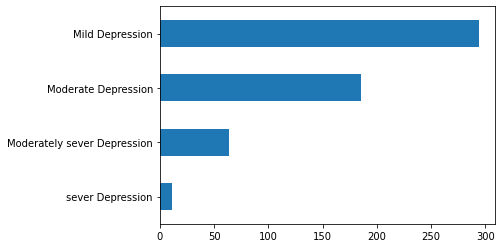

In [ ]:
df["Depression_Type"].value_counts().sort_values().plot(kind = 'barh') #  number of people for each state of depression
print(df["Depression_Type"].value_counts())

In [ ]:
df_2 =df[['Age range in years','Total_score']] # isolating the 'Age range in years','Total_score'

In [ ]:
df_2['Age range in years'].value_counts() # finding the number of person each category

15-30       344
Above 30    328
Name: Age range in years, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_2['Age range in years']=encoder.fit_transform(df_2['Age range in years'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_2['Age range in years'].value_counts() # 0 represents age between 15-30
                                          # 1 represents age between  Above 30

0    344
1    328
Name: Age range in years, dtype: int64

In [ ]:
df_2.corr() # correlation coefficient value between Age range and PHQ-9 collective score. 

,Age range in years,Total_score
Age range in years,1.000000,0.004168
Total_score,0.004168,1.000000
